In [35]:
import os
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

RESULTS_DIR = "data/sae"

# 1) Load vectors into a matrix
vectors = []
messages = []


df = pd.read_parquet(os.path.join(RESULTS_DIR, 'f4f1d8a4.parquet'))
vectors = df['embeddings'].to_numpy()
messages = df['messages']

Matrix shape: (585, 16384)


/home/ubuntu/investigaton-NLP/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


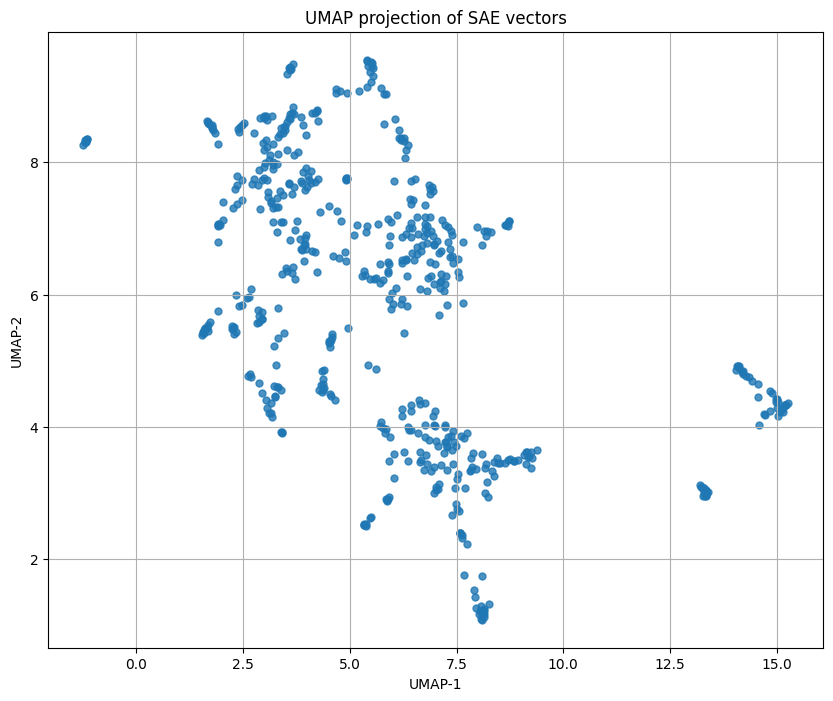

In [36]:
X = np.vstack(vectors)     # shape (N, D)
print("Matrix shape:", X.shape)

# 2) UMAP projection
umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42,
)
X_2d = umap_model.fit_transform(X)

# 3) Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=25, alpha=0.8)

# Optional: annotate each point with filename
# for (x, y), name in zip(X_2d, names):
#     plt.text(x, y, name, fontsize=8)

plt.title("UMAP projection of SAE vectors")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()
